# computing HMP on young subjects data 

This notebook will : 1) load the MNE epochs as HMP objects 2) Normalize & apply dimensionality reduction 3) fit the data to HMP cumulative Model 4) save the results (estimates per trial, sample, event)

## 1) load the MNE epochs as HMP objects

In [1]:
from functions import pre_hmp
import sys
import os
import numpy as np
import mne
import pickle
from config import data_dir
import hmp

young_adults_ids = [303, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319]
# Recovering subject files paths
subj_files = [os.path.join(data_dir,'Dnl', f'S{id}_epochs_preHMP.fif') for id in young_adults_ids]  # Create a list of files with full paths
sfreq = 256 
young_adults_ids_str = [str(id) for id in young_adults_ids] # subjects names
epoch_data = hmp.io.read_mne_data(subj_files, sfreq=sfreq, data_format='epochs',
                            lower_limit_rt=0.4, upper_limit_rt=2, # the function will filter out trials with RTs outside this range
                            rt_col = 'RT_Correct_CorrPU', scale = 1000, #In this case the rts are contained in the metadata of mne epoch in column "RT_Correct_CorrPU" and is in milliseconds
                            verbose=False, subj_name = young_adults_ids_str)#Turning verbose off for the documentation but it is recommended to leave it on as some output from MNE might be useful

Processing participant /workspaces/EEG_preprocess/Data/Dnl/S303_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S303_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


88 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S303_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S305_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S305_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


72 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S305_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S306_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S306_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


63 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S306_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S307_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S307_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


57 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S307_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S308_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S308_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


80 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S308_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S309_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S309_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


60 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S309_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S310_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S310_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


75 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S310_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S311_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S311_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


58 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S311_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S312_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S312_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


61 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S312_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S313_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S313_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


79 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S313_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S314_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S314_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


61 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S314_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S315_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S315_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


57 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S315_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S316_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S316_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


62 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S316_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S317_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S317_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


73 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S317_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S318_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S318_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


50 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S318_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S319_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S319_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


57 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S319_epochs_preHMP.fif


## 2) Normalize & apply dimensionality reduction

/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/preprocessing.py:165: UserWarning: Data will be modified inplace, re-read the data or use copy=True if multiplecalls to this function
  warn(
/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/preprocessing.py:347: RuntimeWarning: Mean of empty slice
  mean_last_dim = np.nanmean(data.values, axis=-1)


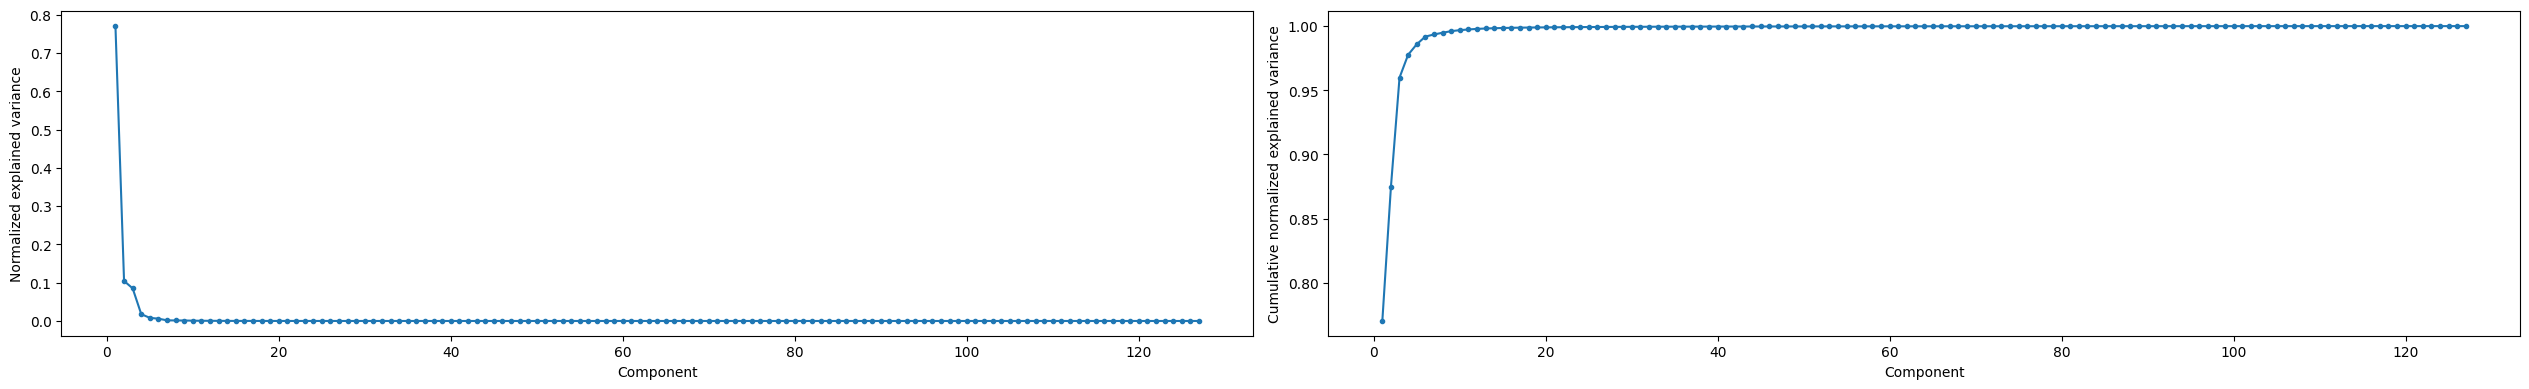

In [8]:
preprocessed = hmp.preprocessing.Standard(epoch_data) # this will ask you to choose the number of components to keep, I chose 6 for 99% variance explained

## 3) fit the data to HMP cumulative Model


In [10]:
# Defining the expected HMP pattern
event_properties = hmp.patterns.HalfSine.create_expected(sfreq=epoch_data.sfreq)
# Performing the crosscorrelation between the preprocessed data and the expected pattern
trial_data = hmp.trialdata.TrialData.from_preprocessed(preprocessed=preprocessed, pattern=event_properties.template)
# bulding the cumulative model

model = hmp.models.eliminative.EliminativeMethod(event_properties)
# fitting and transforming the data
likelihoods , xr_eventprobs = model.fit_transform(trial_data, cpus=4)  


Estimating all solutions for maximal number of events (10)
Estimating all solutions for 9 events


  0%|          | 0/10 [00:00<?, ?it/s]

Estimating all solutions for 8 events


  0%|          | 0/9 [00:00<?, ?it/s]

Estimating all solutions for 7 events


  0%|          | 0/8 [00:00<?, ?it/s]

Estimating all solutions for 6 events


  0%|          | 0/7 [00:00<?, ?it/s]

Estimating all solutions for 5 events


  0%|          | 0/6 [00:00<?, ?it/s]

Estimating all solutions for 4 events


  0%|          | 0/5 [00:00<?, ?it/s]

Estimating all solutions for 3 events


  0%|          | 0/4 [00:00<?, ?it/s]

Estimating all solutions for 2 events


  0%|          | 0/3 [00:00<?, ?it/s]

Estimating all solutions for 1 events


  0%|          | 0/2 [00:00<?, ?it/s]

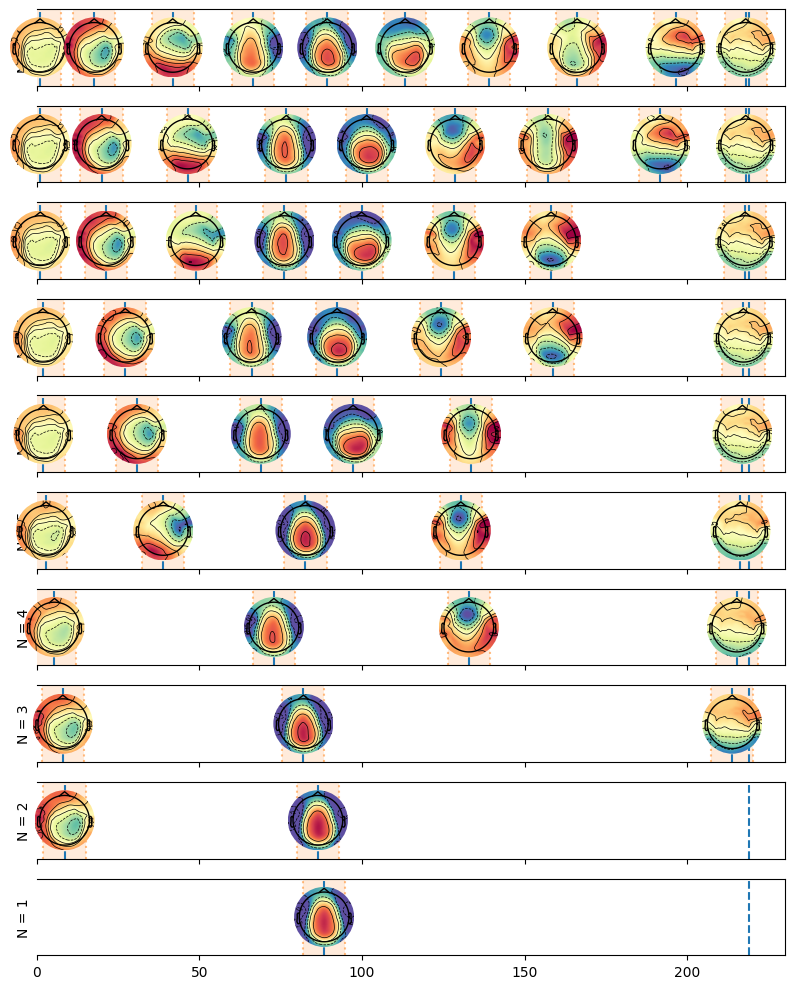

In [11]:
estimates_elim = xr_eventprobs
import matplotlib.pyplot as plt
info = mne.io.read_info(subj_files[0], verbose=True)
fig, axes = plt.subplots(len(estimates_elim.n_events), 1, figsize=(8, len(estimates_elim.n_events)), sharex=True)
for ax, n_event in zip(axes, estimates_elim.n_events):
    hmp.visu.plot_topo_timecourse(epoch_data, estimates_elim.sel(n_events=n_event), info, sensors=False, magnify=1, ax=ax, colorbar=False)
    ax.set_ylabel(f"N = {n_event.values}")
plt.tight_layout()

Text(0, 0.5, 'Log-likelihood')

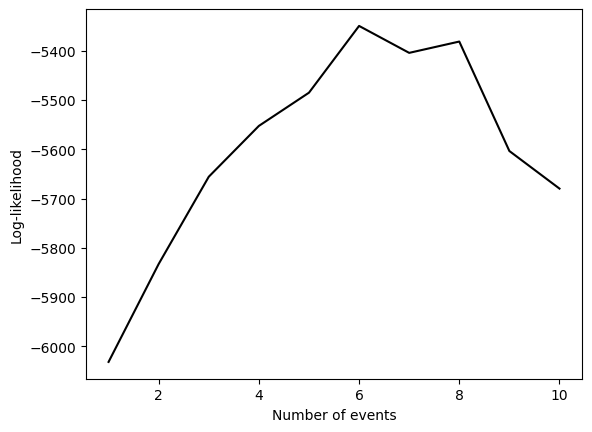

In [ ]:
n_events_backward = [model.submodels[i].n_events for i in model.submodels]
plt.plot(n_events_backward, likelihoods, 'k')
plt.xlabel('Number of events')
plt.ylabel('Log-likelihood')

In [13]:
# save the model estimates
with open(os.path.join(data_dir, 'estimates_elim.pkl'), 'wb') as f:
    pickle.dump(estimates_elim, f)